torch.Size([1, 1, 128, 128])
Range: 0.05882352963089943 to 0.9803921580314636


/tmp/ipykernel_1626348/4100306435.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  afm = cm.get_cmap('afmhot')


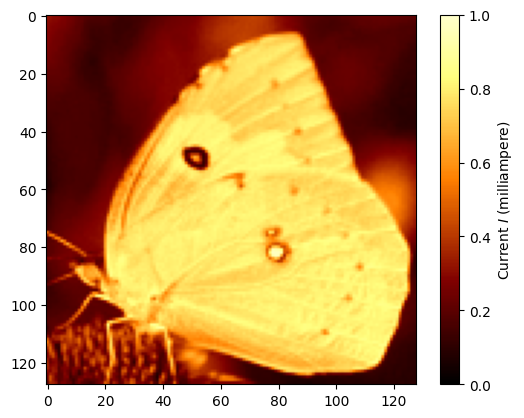

In [ ]:
from PIL import Image
from torchvision.transforms import PILToTensor

J = 7
N = 1 << J

im_path = "Image_6.jpg"
im_pil = Image.open(im_path).convert('L')  # Shape 670 x 703
height, width = im_pil.size
im_pil = im_pil.resize((N, N))  # Resize to 512 x 512
im_tensor = PILToTensor()(im_pil).unsqueeze(0) / 255  # (1,1,H,W)
print(im_tensor.shape)
print(f'Range: {im_tensor.min().item()} to {im_tensor.max().item()}')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

data_minmax = (0.0, 1.0)


# take only the lower 0–90% of afmhot to avoid the white top
afm = cm.get_cmap('afmhot')
cmap = ListedColormap(afm(np.linspace(0.0, 0.90, 256)))

import matplotlib.pyplot as plt
plt.imshow(im_tensor.squeeze().cpu(), cmap=cmap, clim=data_minmax)
plt.colorbar(label=r'Current $I$ (milliampere)')

In [ ]:
from LION.operators.PhotocurrentMapOp import PhotocurrentMapOp, Subsampler

subtract_from_J = 1
delta_divided_by = 4

coarseJ = J - subtract_from_J
delta = 1.0 / delta_divided_by

subsampler = Subsampler(n=N * N, coarseJ=coarseJ, delta=delta)
acquisition_operator = PhotocurrentMapOp(J=J, subsampler=subsampler)

/tmp/ipykernel_1626348/2905823144.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  afm = cm.get_cmap('afmhot')
/tmp/ipykernel_1626348/2905823144.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


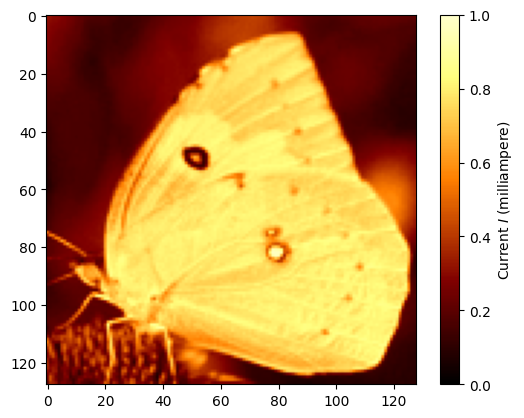

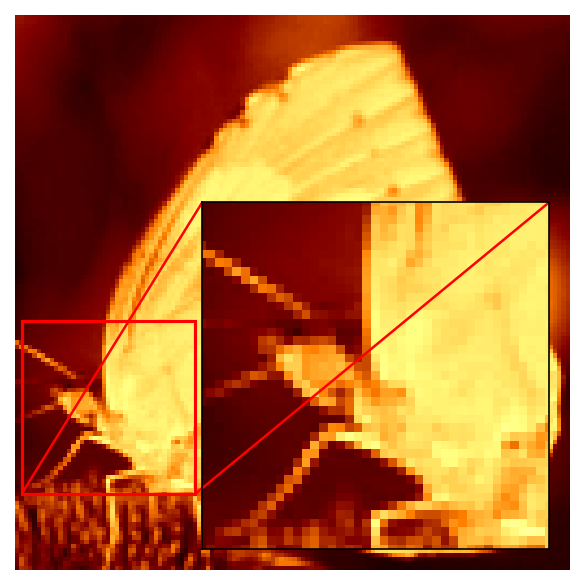

/tmp/ipykernel_1626348/2905823144.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


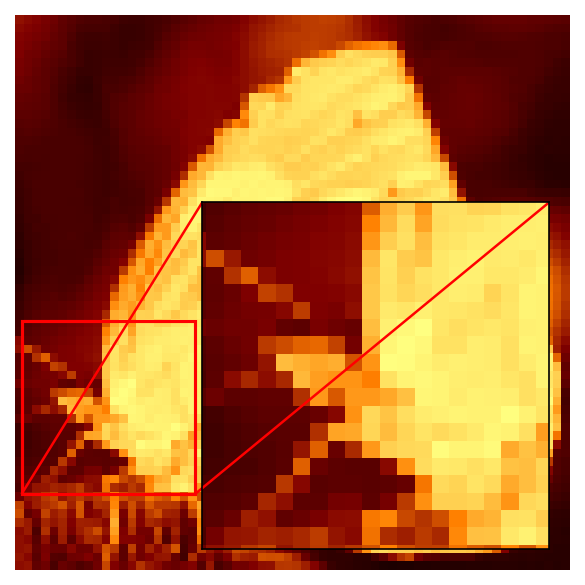

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

data_minmax = (0.0, 1.0)

# take only the lower 0–90% of afmhot to avoid the white top
afm = cm.get_cmap('afmhot')
cmap = ListedColormap(afm(np.linspace(0.0, 0.90, 256)))

import matplotlib.pyplot as plt
plt.imshow(im_tensor.squeeze().cpu(), cmap=cmap, clim=data_minmax)
plt.colorbar(label=r'Current $I$ (milliampere)')

y_subsampled_tensor = acquisition_operator(im_tensor)
im_reconstructed_tensor = acquisition_operator.adjoint(y_subsampled_tensor)

from plot_helper import PlotHelper


img = im_tensor.squeeze().cpu().numpy()
roi = (1, 70, 40, 40)  # (x, y, w, h)
zoom = 2
plot_helper = PlotHelper(roi=roi, zoom=zoom, loc='lower right', show_rect=True, cmap=cmap, clim=data_minmax)

fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
plot_helper.add_zoom_inset(ax, img)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
plot_helper.add_zoom_inset(ax, im_reconstructed_tensor.squeeze().cpu().numpy())
plt.tight_layout()
plt.show()